# GROUP 1 MLP PROJECT

### Roll nos : 
### Prachi Joshi (015009), Surya Chauhan (015029), Muskan Jain (015035)
### Pranshik Arora (015039), Raghav Bansal (015040), Snigdha Mathur (015050)

#### PROBLEM STATEMENT

The main problem that the dataset addresses is to predict whether the client is an defaulter in paying the credit card dues. The main aim is to predict the probablity of deafaulting in the next month using various data related to the customers. 


    DESCRIBING THE VARIABLES IN DATASET
    ID: ID of each client
    LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
    SEX: Gender 
    EDUCATION: Education level of the client(graduate school, university, high school, others, unknown)
    MARRIAGE: Marital status (married, single, others)
    AGE: Age in years
    BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
    BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
    BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
    BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
    BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
    BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
    PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
    PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
    PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
    PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
    PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
    PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
    default.payment.next.month: Default payment (1=yes, 0=no)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
loan = pd.read_csv("C:/Users/Snigdha/Desktop/UCI_Credit_Card.csv")
loan.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,Female,University,Yes,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,Female,University,No,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,Female,University,No,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,Female,University,Yes,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,Male,University,Yes,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
loan.shape

(30000, 19)

In [4]:
loan.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Checking the amount of missing data we have.

In [5]:
loan.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
loan.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                            object
EDUCATION                      object
MARRIAGE                       object
AGE                             int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

## EXPLORATORY ANALYSIS

In [7]:
loan.describe()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


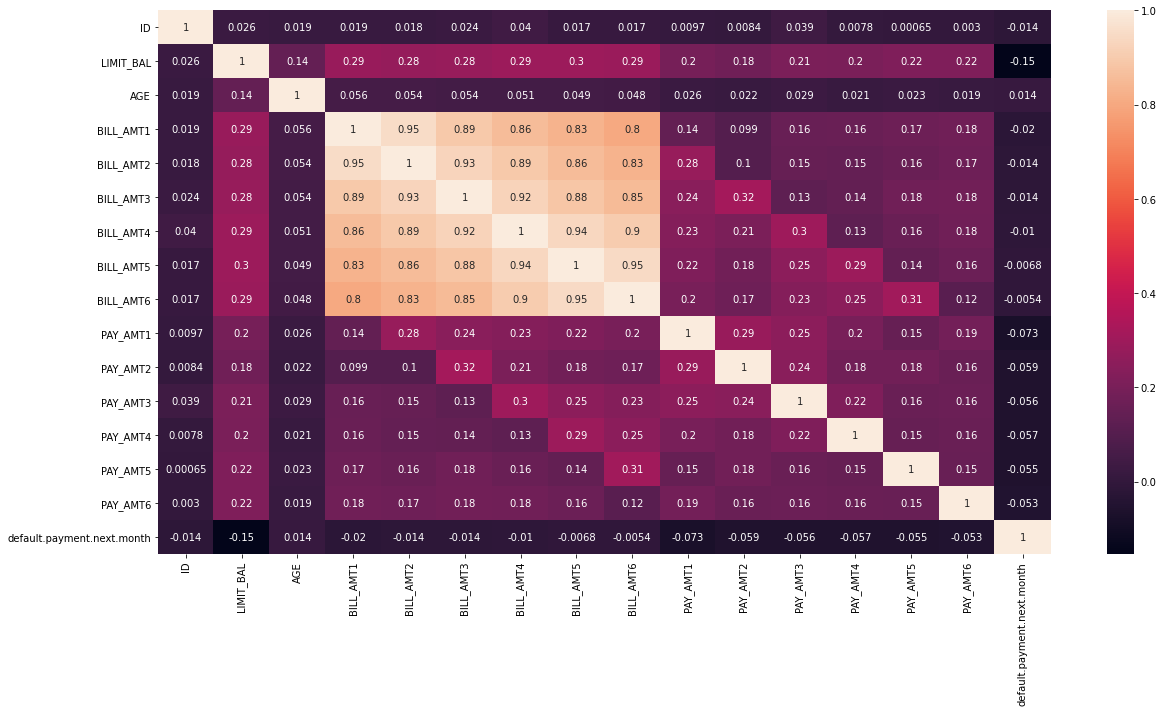

In [8]:
corr = loan.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()
corr = np.array(corr)

1. BILL_AMT variables have a strong positive correlation amongst themselves. This also makes sense as spending patterns of customers tend to remain constant throught the course of 6 months. 
2. 'LIMIT_BAL' has a positive correlation with 'BILLAMT'
3. Default payments have a strong negative correlation with BILL_AMT and PAY_AMT


In [9]:
loan['Total Bill Amount'] = loan['BILL_AMT1']+ loan['BILL_AMT2']+loan['BILL_AMT3']+loan['BILL_AMT4']+loan['BILL_AMT5']+loan['BILL_AMT6']
loan1 = loan.groupby('ID')['Total Bill Amount'].sum()
loan1 = loan1.reset_index()
loan1.head()

,ID,Total Bill Amount
0,1,7704.0
1,2,17077.0
2,3,101653.0
3,4,231334.0
4,5,109339.0


Sum of all previous bill amount for past 6 months

In [10]:
loan['Total Paid Amount'] = loan['PAY_AMT1']+ loan['PAY_AMT2']+loan['PAY_AMT3']+loan['PAY_AMT4']+loan['PAY_AMT5']+loan['PAY_AMT6']
loan2 = loan.groupby('ID')['Total Paid Amount'].sum()
loan2 = loan2.reset_index()
loan2.head()

,ID,Total Paid Amount
0,1,689.0
1,2,5000.0
2,3,11018.0
3,4,8388.0
4,5,59049.0


Sum of all previous paid amount for past 6 months

In [11]:
credit= pd.merge(loan1, loan2, on='ID', how='inner')
credit.head()

,ID,Total Bill Amount,Total Paid Amount
0,1,7704.0,689.0
1,2,17077.0,5000.0
2,3,101653.0,11018.0
3,4,231334.0,8388.0
4,5,109339.0,59049.0


In [12]:
credit['Diff Amount'] = credit['Total Bill Amount']- credit['Total Paid Amount']
credit.head()

,ID,Total Bill Amount,Total Paid Amount,Diff Amount
0,1,7704.0,689.0,7015.0
1,2,17077.0,5000.0,12077.0
2,3,101653.0,11018.0,90635.0
3,4,231334.0,8388.0,222946.0
4,5,109339.0,59049.0,50290.0


In [13]:
loan[['Total Bill Amount','Total Paid Amount','default.payment.next.month']].corr()

,Total Bill Amount,Total Paid Amount,default.payment.next.month
Total Bill Amount,1.000000,0.343906,-0.012691
Total Paid Amount,0.343906,1.000000,-0.102354
default.payment.next.month,-0.012691,-0.102354,1.000000


In order to improve correlations between BILL_AMT and PAY_AMT with default payments, we summed sum all bill and pay amount for 6 months and found the correlation factor.

<AxesSubplot:>

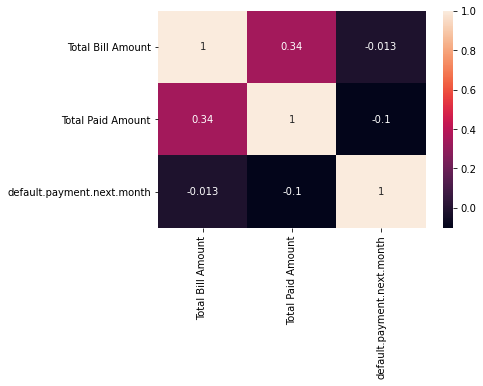

In [14]:
sns.heatmap(loan[['Total Bill Amount','Total Paid Amount','default.payment.next.month']].corr(),annot=True)

After adding the total bill and total paid amount, we get to see that the correlation of total bill and total amount has improved

In [15]:
print("SEX")
print('-------------------------------')
print(loan['SEX'].value_counts())
print('-------------------------------')
print("EDUCATION")
print('----------')
print(loan['EDUCATION'].value_counts())
print('-------------------------------')
print("MARRIAGE")
print('----------')
print(loan['MARRIAGE'].value_counts())
print('-------------------------------')


SEX
-------------------------------
Female    18112
Male      11888
Name: SEX, dtype: int64
-------------------------------
EDUCATION
----------
University         14030
Graduate School    10585
Highschool          4917
Unknown              331
Others               123
0                     14
Name: EDUCATION, dtype: int64
-------------------------------
MARRIAGE
----------
No         15964
Yes        13659
Other        323
Unknown       54
Name: MARRIAGE, dtype: int64
-------------------------------


In [16]:
new_df = loan.groupby(['SEX','default.payment.next.month'])['default.payment.next.month'].count().unstack()
new_df['percentage'] = round((new_df[1]/(new_df[0]+new_df[1]))*100,2)
new_df

default.payment.next.month,0,1,percentage
SEX,,,
Female,14349,3763,20.78
Male,9015,2873,24.17


<AxesSubplot:xlabel='SEX'>

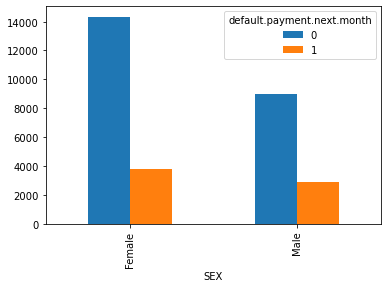

In [17]:
new_df[[0,1]].plot(kind='bar')

From the plot, it's evident that males have a higher probability of defaulting than females, since ~24% of males default compared to ~20% of females

In [18]:
edu_df = loan.groupby(['EDUCATION','default.payment.next.month'])['default.payment.next.month'].count().unstack()
edu_df['percentage'] = round((edu_df[1]/(edu_df[0]+edu_df[1]))*100,2)
edu_df

default.payment.next.month,0,1,percentage
EDUCATION,,,
0,14.0,NaN,NaN
Graduate School,8549.0,2036.0,19.23
Highschool,3680.0,1237.0,25.16
Others,116.0,7.0,5.69
University,10700.0,3330.0,23.73
Unknown,305.0,26.0,7.85


<AxesSubplot:xlabel='EDUCATION'>

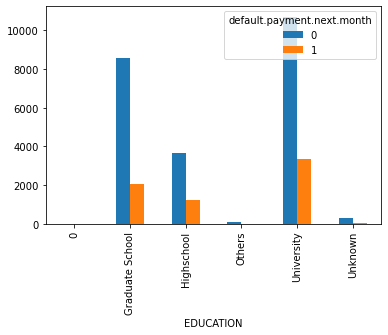

In [19]:
edu_df[[0,1]].plot(kind='bar')

The plot shows that greater amount of education tends to reduce the probability of default.

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

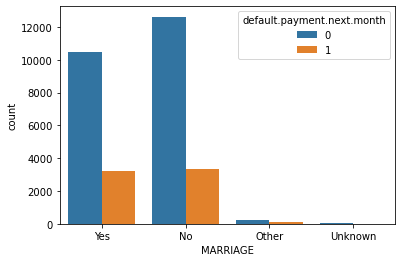

In [20]:
sns.countplot(x='MARRIAGE',data=loan,hue="default.payment.next.month")

Unmarried customers have a higher chance of defaulting than married customers. 

In [21]:
loan['AGE'] = pd.cut(loan['AGE'],bins=[20,30,40,50,60,70,80],labels=[1,2,3,4,5,6])
loan['AGE'].sample(10)

24868    2
26246    1
21476    1
21583    2
18779    1
12298    1
25474    1
25950    2
10959    1
15584    3
Name: AGE, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

Label 1 - age group of 20-30\
Label 2 - age group of 31-40\
Label 3 - age group of 41-50\
Label 4 - age group of 51-60\
Label 5 - age group of 61-70\
Label 6 - age group of 71-80

In [22]:
age_df = loan.groupby(['AGE','default.payment.next.month'])['default.payment.next.month'].count().unstack()
age_df['percentage'] = round((age_df[1]/(age_df[0]+age_df[1]))*100,2)
age_df

default.payment.next.month,0,1,percentage
AGE,,,
1,8542,2471,22.44
2,8524,2189,20.43
3,4606,1399,23.30
4,1493,504,25.24
5,189,68,26.46
6,10,5,33.33


<AxesSubplot:xlabel='AGE'>

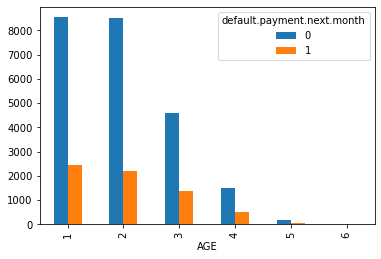

In [23]:
age_df[[0,1]].plot(kind='bar')

Younger customers have fewer chances of defaulting and older customers have a higher probability.


In [24]:
loan.groupby(['AGE'])['LIMIT_BAL'].mean()

AGE
1    132490.692818
2    197271.539251
3    179680.213156
4    159349.023535
5    200194.552529
6    226000.000000
Name: LIMIT_BAL, dtype: float64

The tables shows that customers with graduate school degrees have the highest limits whereas high school pass outs have the least amongst all the categories.

Category '6' i.e age group of 71-80 years has the highest mean limit but has the highest probability of default (from the table)

## MODELLING THE DATA

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = loan[['LIMIT_BAL','Total Bill Amount','Total Paid Amount']]
y = loan['default.payment.next.month']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)


Defining the dataset into test and train. The dataset has been spillted in the ratio of 0.3 (Out of 10, 3 entries are used for training data and the rest 7 for testing data)

In [27]:
from sklearn.preprocessing import MinMaxScaler
mms_xtrain = MinMaxScaler().fit_transform(x_train)
mms_xtest = MinMaxScaler().fit_transform(x_test)

Since there are certain variables with large ranges such as 'LIMIT_BAL', 'TOTAL_BILL' and 'TOTAL_PAY', we will use MinMaxScaler function to convert the ranges to 0-1. Since the ranges for all variables are transformed to the same values, the degree to which they will affect the target variable might become equal and avoid biases towards variables with a larger range.

### K- Nearest Neighbour

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
neighbors,score_predict,score_train = [3,4,5,6,7,8,9],[],[]
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(mms_xtrain,y_train)
    y_ptrain = knn.predict(mms_xtrain)
    y_predict = knn.predict(mms_xtest)
    score_predict.append(metrics.f1_score(y_test,y_predict))
    score_train.append(metrics.f1_score(y_train,y_ptrain))

Using KNN Classifier for predicting the score and then using a graph, noting the number of neighbors where the prediction for the trained data is most accurate

In [29]:
score_predict

[0.13280689160086145,
 0.07234042553191489,
 0.12557077625570776,
 0.06487889273356401,
 0.14327700220426157,
 0.06103494029190624,
 0.12715434699348907]

In [30]:
score_train

[0.55336595688401,
 0.3219612549288531,
 0.42225764381973624,
 0.26917057902973396,
 0.3457058549464202,
 0.23094770658575764,
 0.29408875061404943]

In [31]:
def plots(p,predict,train,xlabel):
    plt.plot(p,predict,'g')
    plt.plot(p,train,'b')
    plt.title('Variation Of F1 Score')
    plt.xlabel(xlabel)
    plt.ylabel('F1 Score')
    plt.legend(('Prediction','Train'))

A pre-defined function for making the plots with F1 score\
F1 score is defined as the weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0

The formula for the F1 score is: F1 = 2 * (precision * recall) / (precision + recall)

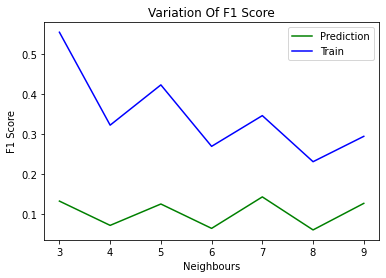

In [32]:
plots(neighbors,score_predict,score_train,'Neighbours')

From the above plot, we can see that  when we increase the number of neighbours, F1 scores of training data reduces and that of test data increases. Therefore in order to avoid overfitting of data, we take neighbours = 5

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(x_test)

In [36]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res



,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.746222,0.348936,0.164,0.223129,0.538286


From KNN Classifier, the Accuracy comes out to be 74.6%, Precision 34.8%, Recall 16.4% and F1 score 22.3%

### Decision Tree Classifier 

We try to identify the ideal depth of the tree as specifies the depth up to which the tree must produce leaf nodes/ prediction nodes. A low depth will cause underfitting and very high will cause overfitting

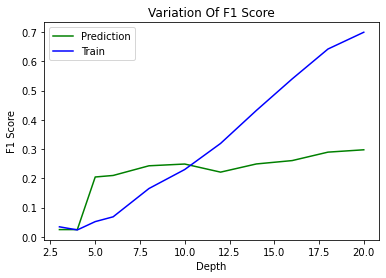

In [37]:

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
depths,score_train,score_predict = [3,4,5,6,8,10,12,14,16,18,20],[],[]
for depth in depths:
    dtc = DecisionTreeClassifier(criterion='entropy',max_depth=depth)
    dtc.fit(mms_xtrain,y_train)
    y_ptrain = dtc.predict(mms_xtrain)
    y_predict = dtc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))
plots(depths,score_predict,score_train,'Depth')


The above plot clearly shows a case of overfitting when the depth increases. As the F1 score for training data increases but the F1 score for the test data decreases. We will set the depth value to 5.

In [38]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0,max_depth=5)

In [39]:
dct.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [40]:
y_pred = dct.predict(x_test)

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [42]:
cm

array([[6964,   36],
       [1973,   27]], dtype=int64)

In [43]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.776778,0.428571,0.0135,0.026175,0.504179


From Decison Tree Classifier, the Accuracy comes out to be 76.9%, Precision 38.9%, Recall 10.9% and F1 score 51.7%

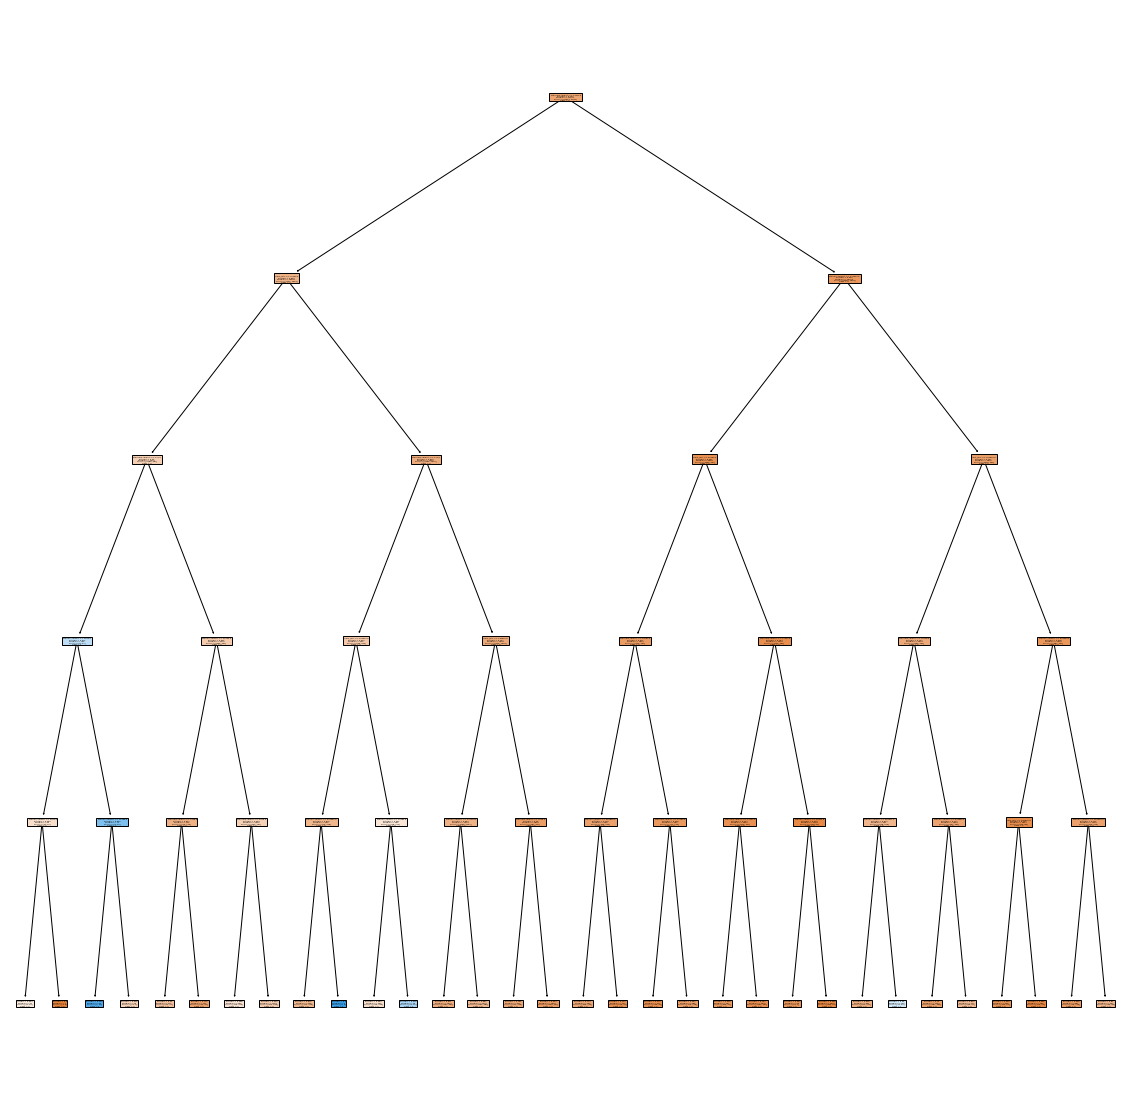

In [44]:
fig = plt.figure(figsize=(20,20))
features = ['LIMIT_BAL','Total Bill Amount','Total Paid Amount']
_ = tree.plot_tree(dct, 
                   feature_names=features,  
                   class_names=['0','1'],
                   filled=True)



### Random Forest Classifier

We will try to identify the estimator parameter, which is the number of decision trees under consideration. 
Optimum depth for the trees was found to be 5 in the Decision Tree Model, therefore we will use the same for this model as well.

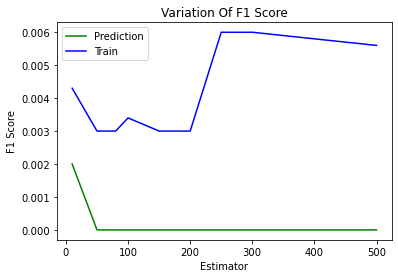

In [45]:
from sklearn.ensemble import RandomForestClassifier
estimators,score_train,score_predict = [10,50,80,100,150,200,250,300,500],[],[]
for est in estimators:
    rfc = RandomForestClassifier(n_estimators=est,criterion='entropy',max_depth=5,random_state=10)
    rfc.fit(mms_xtrain,y_train)
    y_ptrain = rfc.predict(mms_xtrain)
    y_predict = rfc.predict(mms_xtest)
    score_train.append(round(metrics.f1_score(y_train,y_ptrain),4))
    score_predict.append(round(metrics.f1_score(y_test,y_predict),4))

plots(estimators,score_predict,score_train,'Estimator')

From the plot it's evident that F1 scores first increase, then decrease when estimators is set as 100 and increase again. We will use estimators set to 200 for further analysis.

In [46]:
 from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200,criterion = 'entropy',random_state = 0)

In [47]:
rfc.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [48]:
y_pred= rfc.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [50]:
cm

array([[6499,  501],
       [1705,  295]], dtype=int64)

In [51]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.754889,0.370603,0.1475,0.211016,0.537964


From Random Forest Classifier, the Accuracy comes out to be 75.4%, Precision 37.06%, Recall 14.7% and F1 score 53.7%

In [52]:
results = results.append(model,ignore_index = True)
results = results.append(res,ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.754889,0.370603,0.1475,0.211016,0.537964
1,Decision Tree Classifier,0.776778,0.428571,0.0135,0.026175,0.504179
2,K-Nearest Neighbour,0.746222,0.348936,0.1640,0.223129,0.538286


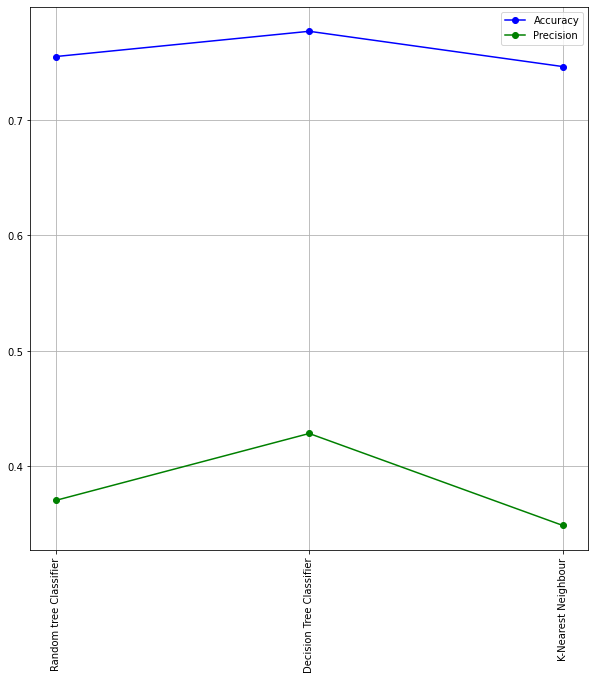

In [82]:
plt.figure(figsize =(10,10))
plt.plot(results['Model'],results['Accuracy'],color='b',marker='o')
plt.plot(results['Model'],results['Precision'],color='g',marker='o')
plt.xticks(rotation= 90)
plt.grid(True)
plt.legend(('Accuracy','Precision'))
plt.show()

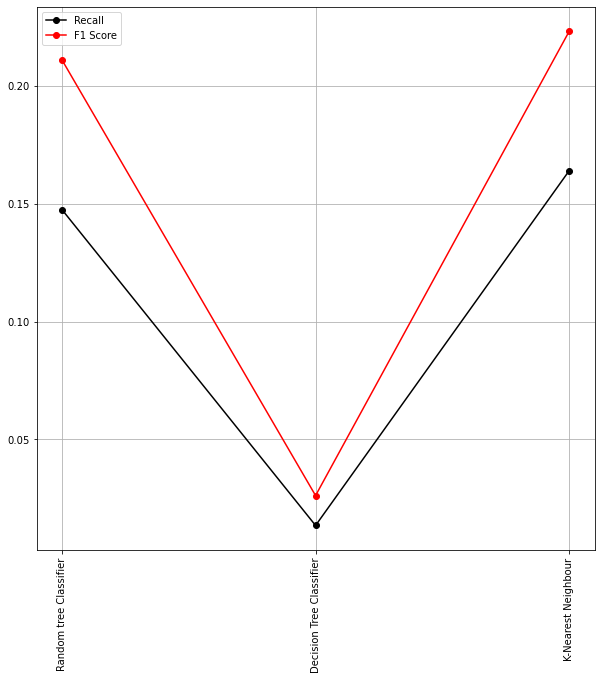

In [83]:
plt.figure(figsize =(10,10))
plt.plot(results['Model'],results['Recall'],color='black',marker='o')
plt.plot(results['Model'],results['F1 Score'],color='r',marker='o')
plt.xticks(rotation= 90)
plt.grid(True)
plt.legend(('Recall','F1 Score'))
plt.show()

### From the above graphs, we can see that Accuracy ,Precision, Recall and F1 score in detecting the occurance of default payment based in the past bill and paid amount is highest while using a Decision Tree Classifier